In [1]:
import pandas as pd
from statsbombpy import sb
import numpy as np
from mplsoccer import Pitch,VerticalPitch, Sbopen, FontManager, inset_image
import plotly.express as px
import matplotlib.pyplot as plt

LINEWIDTH = 1  # starting linewidth
DIFF_LINEWIDTH = 1.2  # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

# The colors are borrowed from mplcyberpunk. Try some of the following alternatives
# '#08F7FE' (teal/cyan), '#FE53BB' (pink), '#F5D300' (yellow),
# '#00ff41' (matrix green), 'r' (red), '#9467bd' (viloet)
BACKGROUND_COLOR = '#212946'
PASS_COLOR = '#FE53BB'
LINE_COLOR = '#08F7FE'
p = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=LINEWIDTH,
              line_alpha=1, goal_alpha=1, goal_type='box')

### Setting the dataframe

In [2]:
MATCH_ID = 3869685
match_event_df = sb.events(match_id=MATCH_ID)
match_360_df = pd.read_json(f'/Users/asheshlalshrestha/Desktop/Datanal/Project/Football Data/open-data-master/data/three-sixty/{MATCH_ID}.json')
df = pd.merge(left=match_event_df,right = match_360_df,
              left_on='id',right_on='event_uuid',how='left')

In [3]:
df

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:19:07.472,Half End,NaN,NaN,NaN,NaN
4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:05:58.866,Half End,NaN,NaN,NaN,NaN
4404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:05:58.866,Half End,NaN,NaN,NaN,NaN
4405,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:49:35.193,Bad Behaviour,NaN,NaN,NaN,NaN


In [4]:
df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

### First lets see the passes played from the Defensive 3rd for france

In [5]:
df_france = df[df['team']=='France']
df_pass = df_france[df_france['type']=='Pass']
df_pass[['x_start','y_start']] = pd.DataFrame(df_pass.location.tolist(),index=df_pass.index)
df_pass[['x_end','y_end']] = pd.DataFrame(df_pass.pass_end_location.tolist(),index=df_pass.index)
df_pass.head()

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/2537660944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass[['x_start','y_start']] = pd.DataFrame(df_pass.location.tolist(),index=df_pass.index)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/2537660944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass[['x_start','y_start']] = pd.DataFrame(df_pass.location.tolist(),index=df_pass.index)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/25376

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:00:00.578,Pass,NaN,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",61.0,40.1,48.0,43.2
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:00:02.724,Pass,NaN,a5956ecc-d637-44d2-8705-e2079e12013e,"[10.227276315524, 80.0, 41.5155332886657, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ...",49.7,43.6,96.0,1.8
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:01:31.390,Pass,NaN,1af94a8d-cb50-4d93-96e1-19fa1ae154fb,"[46.2319746475165, 80.0, 54.3950916985312, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",68.5,5.7,72.1,13.4
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:01:33.075,Pass,NaN,b10bc0c0-2bb9-4d19-80a7-d8e1c9d25a0d,"[47.1067503996774, 80.0, 56.375639662198, 1.70...","[{'teammate': True, 'actor': False, 'keeper': ...",72.3,13.4,73.6,4.7
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:01:34.817,Pass,True,4b7c6ba4-6854-4806-b2ef-804060619a34,"[39.4082739763443, 80.0, 52.9927190454075, 3.6...","[{'teammate': True, 'actor': False, 'keeper': ...",73.2,4.0,47.1,7.4


### Passes played inside defensive 3rd

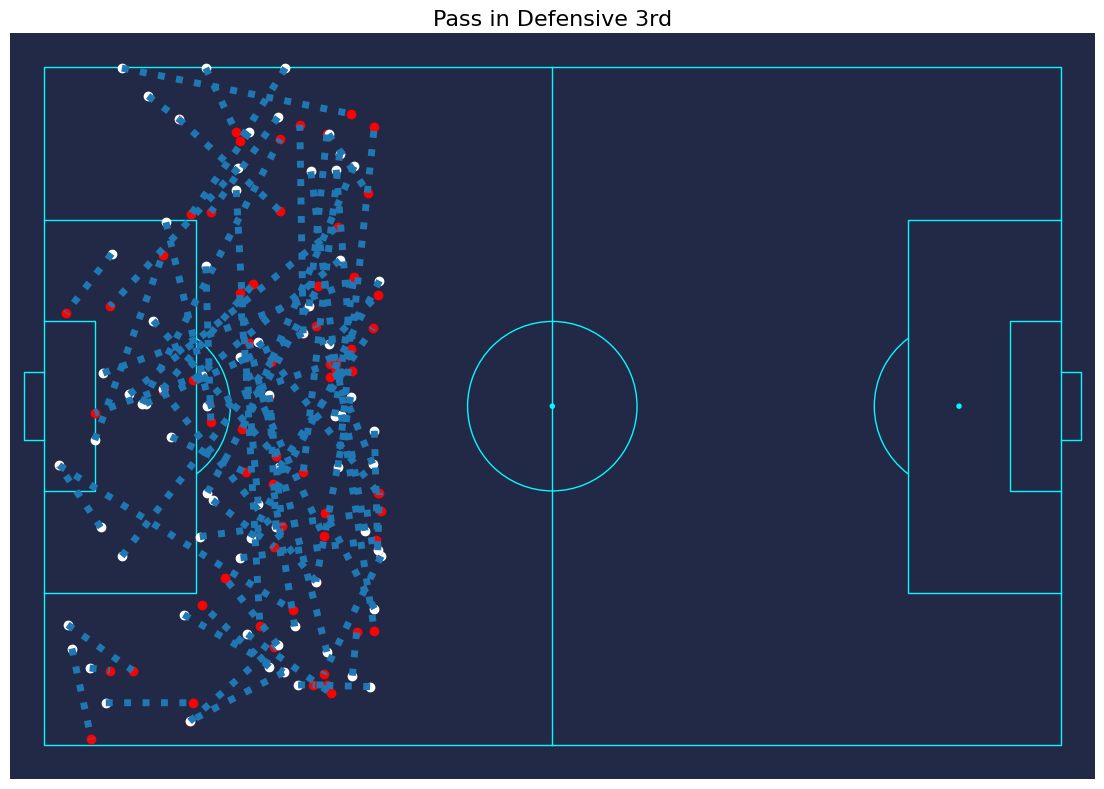

In [6]:
pass_in_def3 = df_pass[(df_pass['x_start']<40) & (df_pass['x_end']<40)]
fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Pass in Defensive 3rd", fontsize=16)
for index, row in pass_in_def3.iterrows():
    p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
    p.scatter(x=row['x_end'], y=row['y_end'], color='red',ax=ax)
    p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 

### Passes played from defensive 3rd to attacking 3rd

We can see that only Hugo Lloris has played the defensive 3rd transition pass to attacking 3rd


player
Hugo Lloris                        11
Theo Bernard François Hernández     1
dtype: int64

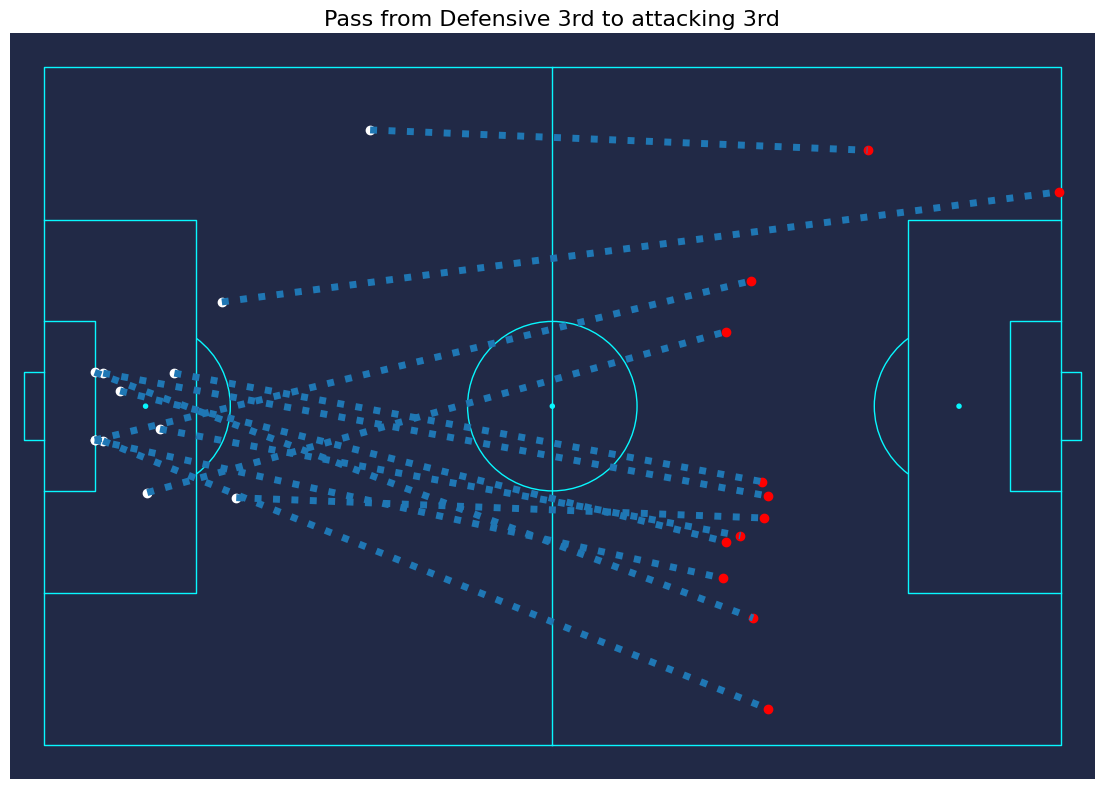

In [7]:
pass_from_def3 = df_pass[(df_pass['x_start']<40) & (df_pass['x_end']>80)]
fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Pass from Defensive 3rd to attacking 3rd", fontsize=16)
for index, row in pass_from_def3.iterrows():
    p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
    p.scatter(x=row['x_end'], y=row['y_end'], color='red',ax=ax)
    p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted')
    
print("We can see that only Hugo Lloris has played the defensive 3rd transition pass to attacking 3rd")
pass_from_def3.groupby('player').size()

### Analyzing the blocks made

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/3131694488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blocks[['x_start','y_start']] = pd.DataFrame(df_blocks.location.tolist(),index=df_blocks.index)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/3131694488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blocks[['x_start','y_start']] = pd.DataFrame(df_blocks.location.tolist(),index=df_blocks.index)


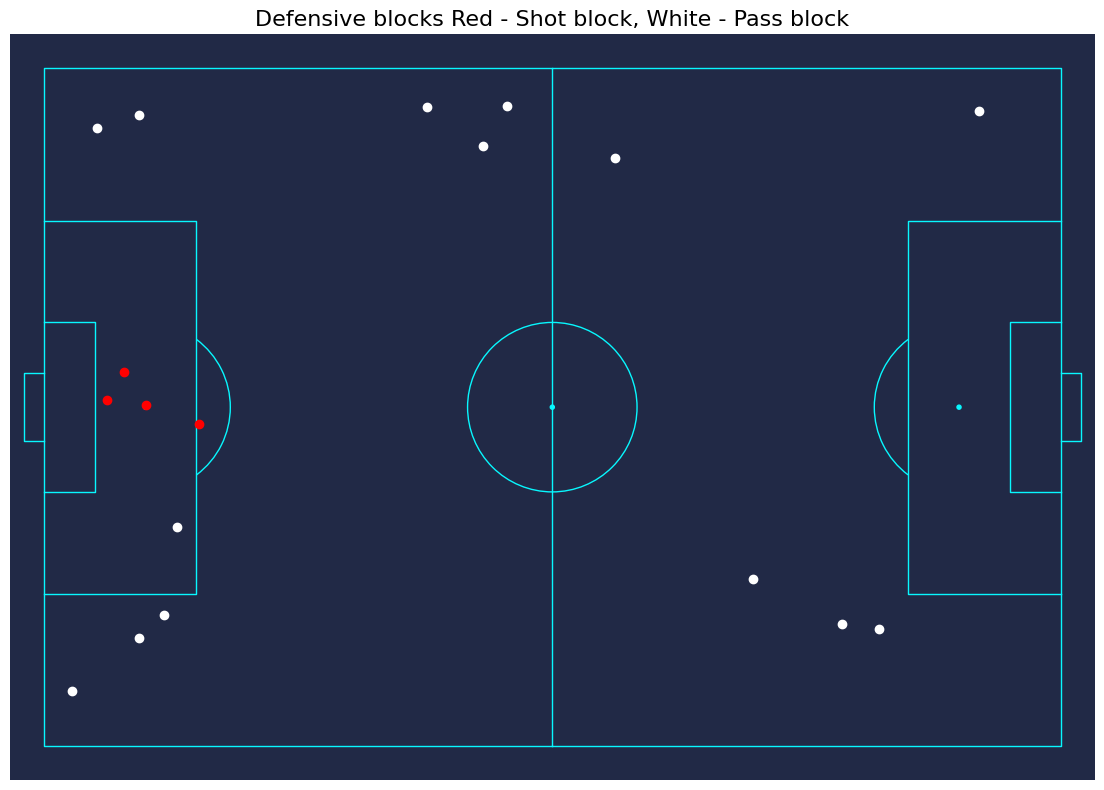

player
Adrien Rabiot                      3
Antoine Griezmann                  1
Aurélien Djani Tchouaméni          1
Dayotchanculle Upamecano           3
Eduardo Camavinga                  1
Jules Koundé                       3
Kingsley Coman                     3
Kylian Mbappé Lottin               1
Marcus Thuram                      2
Ousmane Dembélé                    1
Raphaël Varane                     2
Theo Bernard François Hernández    2
Youssouf Fofana                    1
dtype: int64

In [8]:
df_blocks = df_france[df_france.type == 'Block']
df_blocks[['x_start','y_start']] = pd.DataFrame(df_blocks.location.tolist(),index=df_blocks.index)
fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Defensive blocks Red - Shot block, White - Pass block", fontsize=16)
for index, row in df_blocks.iterrows():
    prev_index = row['index'] - 1
    prev_row = df[df['index'] == prev_index]
    if not prev_row.empty:
        if prev_row.iloc[0]['type'] == 'Pass':
            p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        elif prev_row.iloc[0]['type'] == 'Shot':
            p.scatter(x=row['x_start'], y=row['y_start'], color='red',ax=ax)

plt.show()

df_blocks.groupby('player').size()

### Analyzing the average defensive position

In [9]:
## Defensive actions include 'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block', 'Miscontrol', 'Clearance', 'Duel', 'Interception', and 'Shield'

## calculating the mean position of the players while performing defensive actions
defensive_actions = ['Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block', 'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Shield']
df_def_action = df_france[df_france['type'].isin(defensive_actions)]
df_def_action['player'] = df_def_action['player'].apply(lambda x: x.split(" ")[-1])
df_def_action[['x_start','y_start']] = pd.DataFrame(df_def_action.location.tolist(),index=df_def_action.index)
scatter_df = pd.DataFrame()
for i, name in enumerate(df_def_action["player"].unique()):
    x = df_def_action.loc[df_def_action["player"] == name]["x_start"].to_numpy()
    y = df_def_action.loc[df_def_action["player"] == name]["y_start"].to_numpy()
    scatter_df.at[i, "player"] = name
    # make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(x)
    scatter_df.at[i, "y"] = np.mean(y)

scatter_df.head()

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/2198521575.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def_action['player'] = df_def_action['player'].apply(lambda x: x.split(" ")[-1])
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/2198521575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def_action[['x_start','y_start']] = pd.DataFrame(df_def_action.location.tolist(),index=df_def_action.index)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18

,player,x,y
0,Rabiot,51.125000,23.430000
1,Dembélé,57.275000,67.366667
2,Tchouaméni,57.513158,41.155263
3,Griezmann,50.130769,48.573077
4,Giroud,78.446154,36.538462


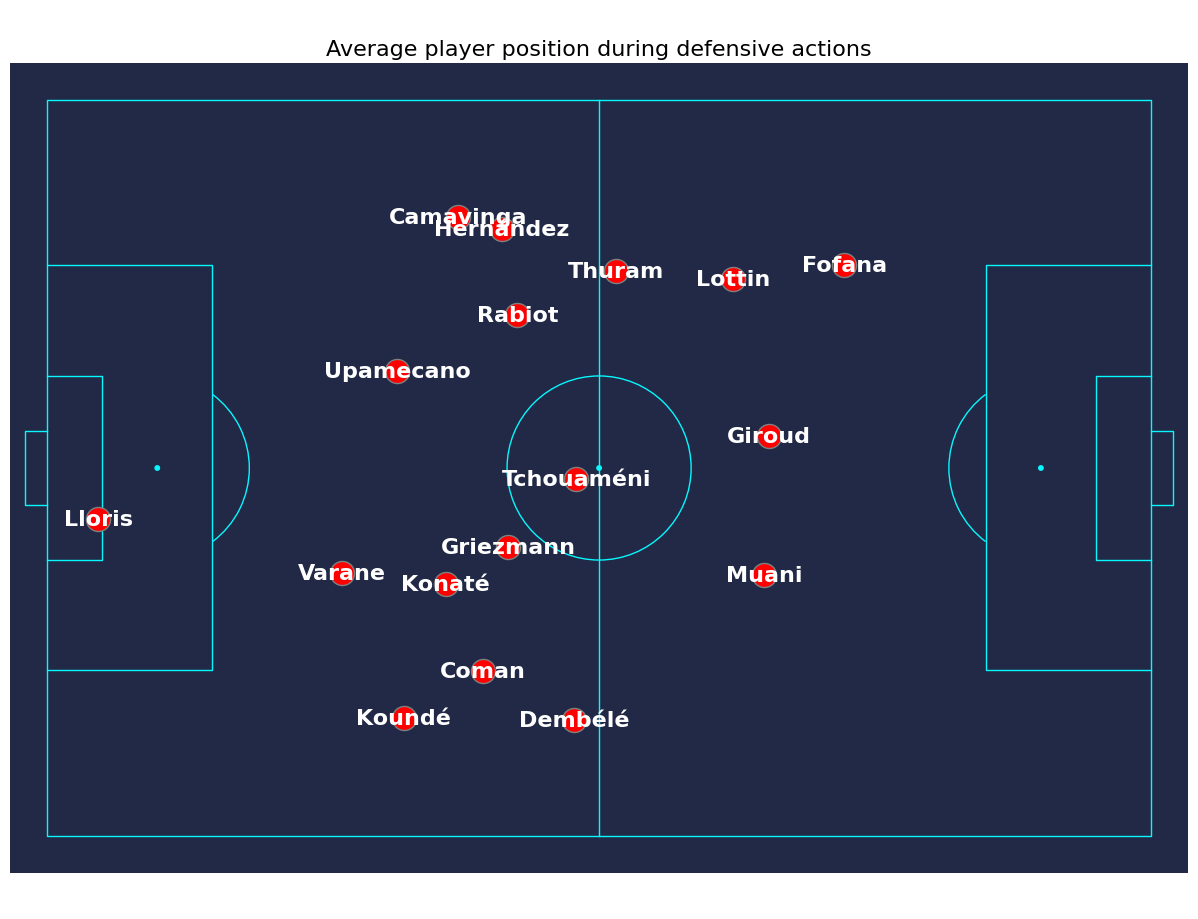

In [10]:
# Drawing pitch
fig, ax = p.grid(grid_height=0.9, title_height=0.06, axis=False,
                 endnote_height=0.04, title_space=0, endnote_space=0)

# Check if ax is a dictionary with pitch as key, then assign the Axes object
if "pitch" in ax:
    ax = ax["pitch"]

# Setting the title on the Axes object
ax.set_title("Average player position during defensive actions", fontsize=16)

# Scatter the location on the pitch
p.scatter(scatter_df.x, scatter_df.y, s=300, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax, zorder=3)

# Annotating player name
for i, row in scatter_df.iterrows():
    ax.annotate(row['player'], xy=(row['x'], row['y']), color='white', va='center', ha='center', fontweight="bold", fontsize=16, zorder=4)

# Show the plot
plt.show()


In [27]:
# Filter the data for the French team
df_france = df[df['team'] == 'Argentina']

# Define the list of defensive actions
defensive_actions = ['Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block', 'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Shield']

# Filter for defensive actions
df_def_action = df_france[df_france['type'].isin(defensive_actions)]

# Extract the last name of the player
df_def_action['player'] = df_def_action['player'].apply(lambda x: x.split(" ")[-1])

# Extract x and y coordinates and ensure they are numeric
df_def_action['x_start'] = df_def_action['location'].apply(lambda x: float(x[0]) if isinstance(x, (list, tuple)) and len(x) > 0 else np.nan)
df_def_action['y_start'] = df_def_action['location'].apply(lambda x: float(x[1]) if isinstance(x, (list, tuple)) and len(x) > 1 else np.nan)

# Remove any rows with NaN values in x_start or y_start
# Create a scatter DataFrame
scatter_df = pd.DataFrame()

# Calculate mean x and y coordinates for each player
for i, name in enumerate(df_def_action["player"].unique()):
    player_data = df_def_action[df_def_action["player"] == name]
    x = player_data["x_start"].to_numpy()
    y = player_data["y_start"].to_numpy()

    scatter_df.at[i, "player"] = name
    scatter_df.at[i, "x"] = np.mean(x)
    scatter_df.at[i, "y"] = np.mean(y)

df_def_action[['player','x_start','y_start']]
# p = Pitch(pitch_type='statsbomb')
# fig, ax = p.draw(figsize=(12, 8))
# p.draw(ax=ax)  
# # Setting the title on the Axes object
# ax.set_title("Average player position during defensive actions", fontsize=16)

# # Scatter the location on the pitch
# p.scatter(scatter_df.x, scatter_df.y, s=300, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax, zorder=3)

# # Annotating player name
# for i, row in scatter_df.iterrows():
#     ax.annotate(row['player'], xy=(row['x'], row['y']), color='black', va='center', ha='center', fontweight="bold", fontsize=16, zorder=4)

# # Show the plot
# plt.show()


/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/1828895066.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def_action['player'] = df_def_action['player'].apply(lambda x: x.split(" ")[-1])
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_18669/1828895066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def_action['x_start'] = df_def_action['location'].apply(lambda x: float(x[0]) if isinstance(x, (list, tuple)) and len(x) > 0 else np.nan)
/var/folders/9b/q0txn0fd5qj57

,player,x_start,y_start
3333,Paul,48.2,70.7
3334,Paul,44.9,72.3
3342,Cuccittini,82.2,31.2
3343,Allister,92.5,14.9
3345,Paul,44.8,74.2
...,...,...,...
4142,Hernández,42.6,44.7
4143,Lucero,54.8,73.1
4144,Paul,20.1,64.8
4146,Álvarez,50.3,66.5
